        ┌───┐ ░ ┌─┐
     Q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0 


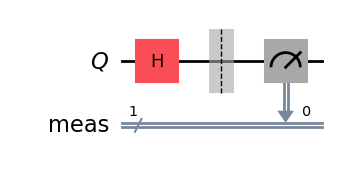

In [4]:
from qiskit import QuantumCircuit, QuantumRegister

# Create a new qubit called 'Q'
q = QuantumRegister(1, 'Q')

# Create a new circuit with two qubits
qc = QuantumCircuit(q)

# Add a Hadamard gate to qubit 0
qc.h(0)

qc.measure_all()

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.

print(qc.draw())

qc.draw(output="mpl")



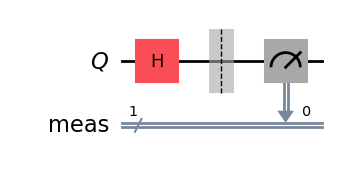

In [5]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import Aer

# Optimize for quantum execution
backend = Aer.get_backend('qasm_simulator')
target = backend.target
pass_manager = generate_preset_pass_manager(target=target, optimization_level=0, backend=backend)

# Transpile it by calling the run method of the pass manager
transpiled = pass_manager.run(qc)
 
# Draw it, excluding idle qubits from the diagram
transpiled.draw("mpl", idle_wires=False, style="iqp")

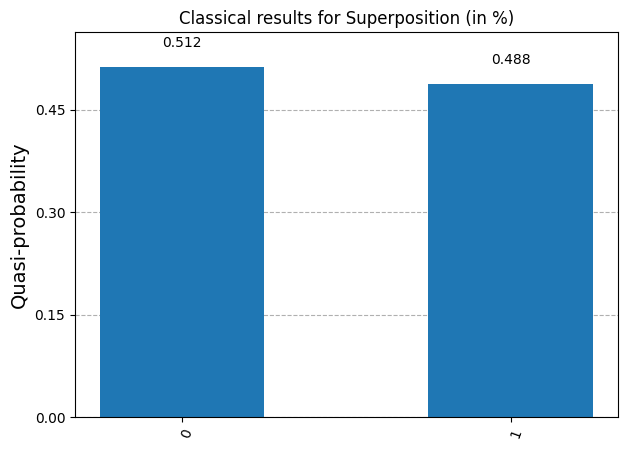

In [6]:
# Imports from Qiskit Runtime
from qiskit_ibm_runtime import SamplerV2 as Sampler

from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution

# Here we can configure the sample, such as:
# sampler.options.default_shots = 500
sampler = Sampler(mode=backend)

# Create a job to be executed locally or remote
job = sampler.run([transpiled], shots=500)

# Create histogram from job result
result = job.result()
dist = result[0].data.meas.get_counts()
plot_distribution(dist, title="Classical results for Superposition (in %)")

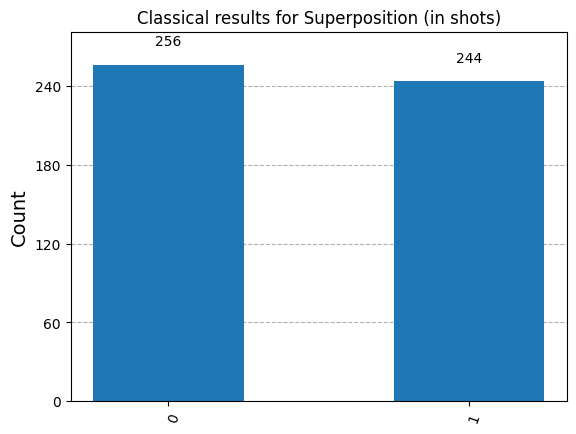

In [7]:
plot_histogram(dist, title="Classical results for Superposition (in shots)")
